In [100]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator
from datasets import MovieLensGenreCastUserData, RatioSplit, CrossValidation, NetflixData
from models import BinaryMFThreshold, BinaryMFThresholdExCustomFactors
from models import WeightedNMF
from utils import show_matrix


import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
d = NetflixData(size='small')
d.load()

In [103]:
d.X

<9992x4945 sparse matrix of type '<class 'numpy.intc'>'
	with 607803 stored elements in Compressed Sparse Row format>

[I] m            : 120
[I] n            : 100
[I] k            : 5
[I] overlap      : [0.5 0.5 0.5 0.5]
[I] seed         : 1706010900


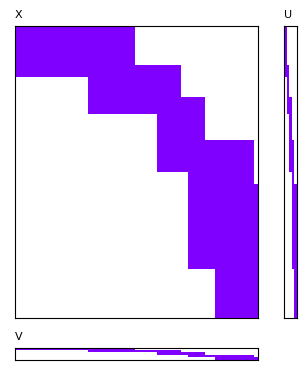

In [73]:
m = BlockDiagonalMatrixGenerator(m=120, n=100, k=5, overlap=[0.5, 0.5, 0.5, 0.5])
m.generate()
m.show_matrix()

In [82]:
model = WeightedNMF(k=5)

[I] k            : 5
[I] seed         : 1706010977
[I] init         : random
[I] max_iter     : 1000


In [109]:
X = m.X
# W = X.copy()
W = np.ones(shape=X.shape)

model.fit(X_train=X, W=W)

[I] Missing validation data.
Beginning Run 1...
|--- Initializing U,V
|--- Running wNMF
|--- Completed


In [110]:
X

<120x100 sparse matrix of type '<class 'numpy.intc'>'
	with 4014 stored elements in Compressed Sparse Row format>

In [112]:
W.shape

(120, 100)

In [84]:
model.model.__dict__

{'n_components': 5,
 'init': 'random',
 'beta_loss': 'frobenius',
 'max_iter': 1000,
 'tol': 0.0001,
 'random_state': 1706010977,
 'rescale': False,
 'track_error': False,
 'verbose': 1,
 'X': None,
 'components_': array([[0.26267192, 0.16051053, 0.16472853, 0.37682865, 0.15479639],
        [0.39760222, 0.06155246, 0.08131885, 0.52479829, 0.02507328],
        [0.21147923, 0.21616117, 0.2559829 , 0.26468679, 0.18890606],
        [0.1389048 , 0.27258889, 0.31151543, 0.17515701, 0.25592287],
        [0.29334571, 0.13903738, 0.14913342, 0.40729241, 0.12446693],
        [0.191319  , 0.23034002, 0.26648426, 0.2444432 , 0.20877125],
        [0.10702409, 0.30258784, 0.35304233, 0.11971124, 0.28103654],
        [0.21611916, 0.20919799, 0.24140719, 0.28078317, 0.1874068 ],
        [0.16771965, 0.24800996, 0.28230978, 0.21743079, 0.23112629],
        [0.17428448, 0.24482924, 0.28360558, 0.21958177, 0.22347074],
        [0.2948812 , 0.15483365, 0.2037848 , 0.35671678, 0.10888587],
        [0.09322

In [113]:
U, V = model.U, model.V

In [95]:
V.shape

(100, 5)

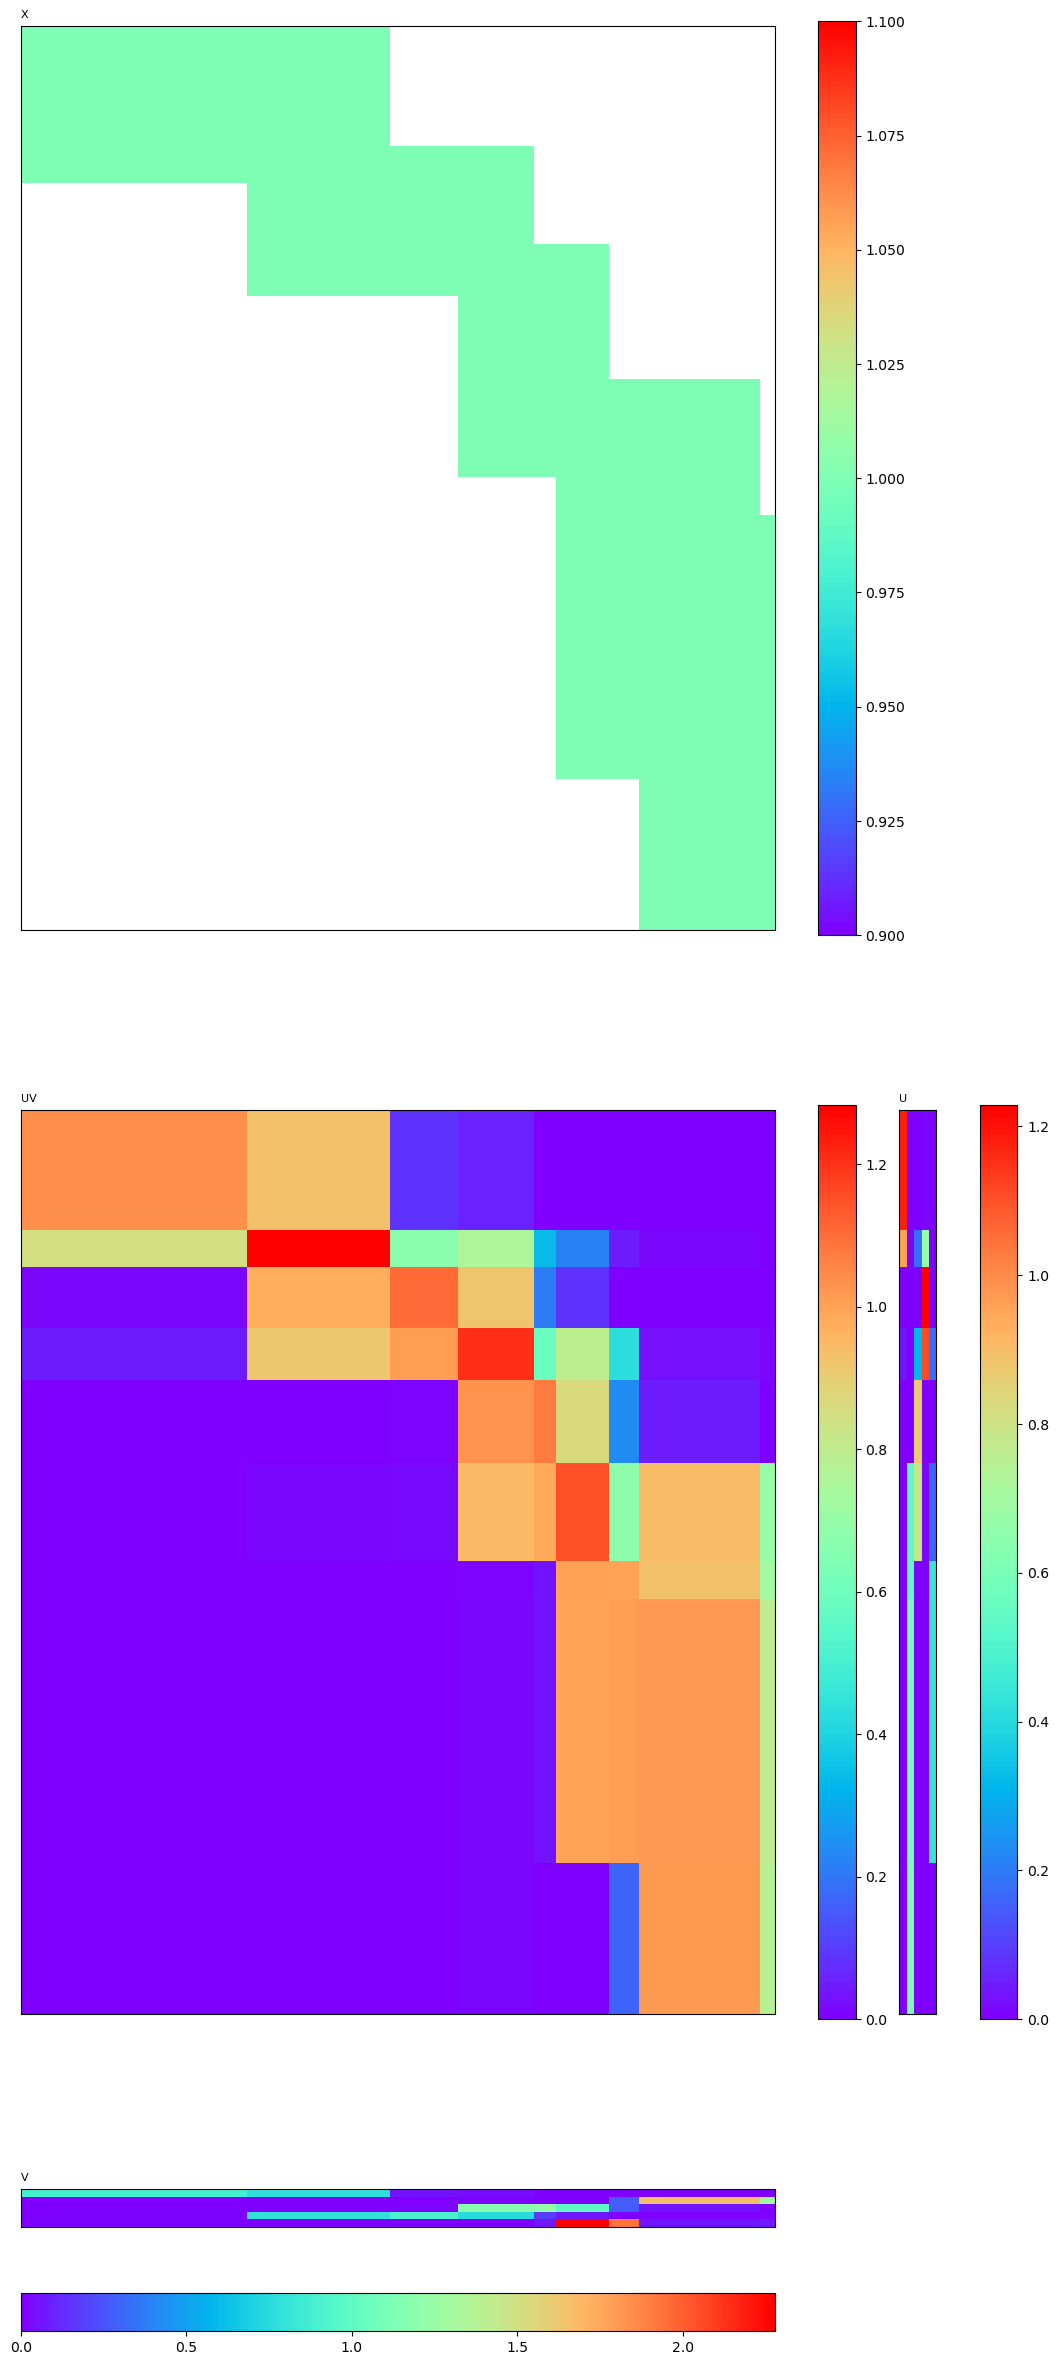

In [114]:
settings = [(X, [0, 0], 'X'), 
            (U @ V.T, [1, 0], 'UV'), 
            (U, [1, 1], 'U'), 
            (V.T, [2, 0], 'V')]
show_matrix(settings=settings, colorbar=True, scaling=2)

In [64]:
## Mock data, a 100x100 data matrix, reduce to 25 dimensions
n=100
features = 100
components=25
X = 100*np.random.uniform(size=n*features).reshape(features,n)
W = np.ones_like(X)

## Define the model / fit
from models.wnmf import wNMF
model = wNMF(n_components=25,
            beta_loss='kullback-leibler',
            max_iter=1000,
            track_error=True)

fit = model.fit(X=X,W=W,n_run=5)

Beginning Run 1...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 2...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 3...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 4...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 5...
|--- Initializing U,V
|--- Running wNMF
|--- Completed


In [65]:
## Get the best solutions
lowest_error = fit.err
best_V = fit.V
best_U = fit.U

## Or look at all the solutions from the 5 runs in this example
all_Vs = fit.V_all

In [66]:
best_U

array([[5.33359338e+00, 1.72880490e-60, 1.50845910e+00, ...,
        6.51592681e-01, 6.49846945e-01, 7.15859063e-01],
       [1.02828477e-01, 6.72459999e-01, 1.67777549e+00, ...,
        2.87002091e-41, 3.86989965e+00, 1.53138819e+00],
       [2.47562673e-01, 7.90033893e-09, 1.82552928e-40, ...,
        4.48715223e+00, 3.60898869e-02, 1.63721569e+00],
       ...,
       [9.74410852e-01, 5.68010980e+00, 6.88874453e-01, ...,
        2.52726883e-02, 1.59706230e+00, 6.21355883e+00],
       [5.78494465e-22, 5.26875747e+00, 6.66984756e-18, ...,
        1.63200216e+00, 9.40857869e-18, 1.55737686e-01],
       [1.27628195e-25, 1.18132518e+00, 2.23731258e-33, ...,
        4.05732283e-01, 2.68419305e-28, 4.22964010e-46]])